# Dimensionality reduction
 

Es. 1
- Consider the dataset parkinson.csv, including 756 samples (rows) described by 754 features (columns), plus the last binary column (class) indicating whether the sample is a patient (class 1) or an healthy control (class 0). Using a dimensionality reduction planar projection on the 754 describing features (using the method you rate as the most adequate), color the samples according to their class and discuss if the patients and controls can be separated into two distinct groups in the projection.

## PCA

In [52]:
#load cvs
import pandas as pd
import time
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('ggplot')

In [39]:
df = pd.read_csv(r"C:\Users\cirob\Desktop\Data visualization lab\Parkinson.csv")
df.head(3)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1


In [40]:
df = df.sample(frac = 1, random_state = 42)

df.drop('id', axis = 1, inplace = True)

df

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
408,0,0.76874,0.78653,0.37494,422,421,0.004567,0.000062,0.00093,0.000004,...,147.5937,67.2748,13.1469,7.2492,8.1660,6.7870,4.2669,3.2491,3.1642,0
97,1,0.76704,0.81870,0.51009,221,220,0.008737,0.000061,0.00255,0.000022,...,1.8482,1.8973,6.2439,4.3607,4.9784,4.9740,4.5173,6.2419,49.3334,1
424,1,0.56693,0.78076,0.80600,237,236,0.008124,0.000534,0.01989,0.000162,...,1.6087,1.7636,2.9845,2.7378,2.6797,2.5375,3.4493,3.4317,8.5358,1
584,0,0.82235,0.73729,0.31873,520,519,0.003714,0.000024,0.00059,0.000002,...,11.5115,6.5381,5.3690,5.4779,5.8810,5.1919,5.7376,7.1185,5.6304,0
603,0,0.80641,0.70794,0.62140,448,447,0.004313,0.000203,0.00242,0.000010,...,4.2035,2.9159,3.4232,2.9801,2.7891,3.2759,3.5631,2.8654,3.3151,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1,0.31431,0.77186,0.62721,231,230,0.008341,0.000250,0.00327,0.000027,...,4.7490,7.6582,12.3930,3.1410,2.9371,4.4207,6.4558,4.9663,5.0628,1
106,0,0.82435,0.67512,0.37135,415,414,0.004644,0.000030,0.00076,0.000004,...,5.2622,3.3257,2.6209,2.5962,2.9097,3.4120,2.6230,2.7187,3.0654,1
270,0,0.50598,0.64620,0.69831,168,167,0.011474,0.000296,0.00729,0.000084,...,6.1377,6.1270,4.7823,4.8881,2.5868,2.9627,3.8031,3.7451,2.9601,1
435,1,0.82759,0.63558,0.37521,344,343,0.005612,0.000053,0.00121,0.000007,...,160.6611,130.0455,100.7989,56.3096,32.9181,39.1589,46.2313,38.2874,42.7546,1


In [43]:
col_names = df.columns[1:-1]

df[col_names]

,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
408,0.76874,0.78653,0.37494,422,421,0.004567,0.000062,0.00093,0.000004,0.00011,...,193.5179,147.5937,67.2748,13.1469,7.2492,8.1660,6.7870,4.2669,3.2491,3.1642
97,0.76704,0.81870,0.51009,221,220,0.008737,0.000061,0.00255,0.000022,0.00115,...,1.8740,1.8482,1.8973,6.2439,4.3607,4.9784,4.9740,4.5173,6.2419,49.3334
424,0.56693,0.78076,0.80600,237,236,0.008124,0.000534,0.01989,0.000162,0.00777,...,2.5709,1.6087,1.7636,2.9845,2.7378,2.6797,2.5375,3.4493,3.4317,8.5358
584,0.82235,0.73729,0.31873,520,519,0.003714,0.000024,0.00059,0.000002,0.00007,...,41.3634,11.5115,6.5381,5.3690,5.4779,5.8810,5.1919,5.7376,7.1185,5.6304
603,0.80641,0.70794,0.62140,448,447,0.004313,0.000203,0.00242,0.000010,0.00014,...,2.4599,4.2035,2.9159,3.4232,2.9801,2.7891,3.2759,3.5631,2.8654,3.3151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.31431,0.77186,0.62721,231,230,0.008341,0.000250,0.00327,0.000027,0.00099,...,3.4251,4.7490,7.6582,12.3930,3.1410,2.9371,4.4207,6.4558,4.9663,5.0628
106,0.82435,0.67512,0.37135,415,414,0.004644,0.000030,0.00076,0.000004,0.00008,...,6.3202,5.2622,3.3257,2.6209,2.5962,2.9097,3.4120,2.6230,2.7187,3.0654
270,0.50598,0.64620,0.69831,168,167,0.011474,0.000296,0.00729,0.000084,0.00210,...,2.1926,6.1377,6.1270,4.7823,4.8881,2.5868,2.9627,3.8031,3.7451,2.9601
435,0.82759,0.63558,0.37521,344,343,0.005612,0.000053,0.00121,0.000007,0.00016,...,57.3059,160.6611,130.0455,100.7989,56.3096,32.9181,39.1589,46.2313,38.2874,42.7546


In [54]:
#Normalization
normalized = (df[col_names] - df[col_names].min())/(df[col_names].max() - df[col_names].min())

normalized['gender'] = df.gender
normalized['class'] = df['class']

normalized

C:\Users\cirob\AppData\Local\Temp\ipykernel_24388\4264712181.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized['gender'] = df.gender
C:\Users\cirob\AppData\Local\Temp\ipykernel_24388\4264712181.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized['class'] = df['class']


,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,...,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,gender,class
408,0.839604,0.786149,0.307757,0.464088,0.464602,0.226530,0.014833,0.026144,0.013894,0.008160,...,0.325816,0.096399,0.054768,0.076108,0.071739,0.039990,0.023264,0.005194,0,0
97,0.837642,0.890212,0.496269,0.241989,0.242257,0.610543,0.014545,0.084967,0.084107,0.102448,...,0.001812,0.038855,0.026015,0.038062,0.046525,0.044153,0.077102,0.304878,1,1
424,0.606597,0.767484,0.909015,0.259669,0.259956,0.554076,0.150843,0.714597,0.628850,0.702629,...,0.001149,0.011684,0.009861,0.010625,0.012639,0.026396,0.026549,0.040061,1,1
584,0.901502,0.626868,0.229353,0.572376,0.573009,0.148011,0.003831,0.013798,0.005919,0.004533,...,0.024811,0.031561,0.037136,0.048835,0.049555,0.064442,0.092872,0.021202,0,0
603,0.883098,0.531927,0.651528,0.492818,0.493363,0.203180,0.055352,0.080247,0.037976,0.010879,...,0.006860,0.015341,0.012273,0.011931,0.022908,0.028288,0.016361,0.006174,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.314925,0.738694,0.659632,0.253039,0.253319,0.574062,0.068899,0.111111,0.104045,0.087942,...,0.030362,0.090114,0.013874,0.013697,0.038830,0.076383,0.054155,0.017518,1,1
106,0.903811,0.425762,0.302749,0.456354,0.456858,0.233599,0.005588,0.019971,0.011040,0.005440,...,0.008891,0.008653,0.008451,0.013370,0.024801,0.012658,0.013722,0.004553,0,1
270,0.536225,0.332212,0.758805,0.183425,0.183628,0.862607,0.082169,0.257081,0.324535,0.188577,...,0.022774,0.026671,0.031265,0.009516,0.018553,0.032278,0.032187,0.003869,0,1
435,0.907552,0.297859,0.308133,0.377901,0.378319,0.322822,0.012270,0.036311,0.023785,0.012693,...,0.636902,0.827076,0.543127,0.371542,0.521952,0.737703,0.653581,0.262175,1,1


In [55]:
np.random.seed(10)

# PCA
pca = PCA(n_components=2, random_state = 42)

pca_result = pca.fit_transform(normalized.iloc[:, :-1])

Text(0, 0.5, 'PCA second parameter')

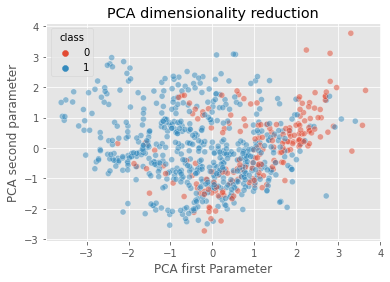

In [58]:
#Plot PCA
sns.scatterplot(x=pca_result[:, 0],
                y= pca_result[:, 1],
                hue=normalized['class'],
                legend="full", alpha=0.5)


plt.title('PCA dimensionality reduction')
plt.xlabel('PCA first Parameter')
plt.ylabel('PCA second parameter')

## UMAP

- Consider the datafile microbiome.csv, collecting the abundances of 6696 bacterial species (OTU) of 675 patients. Prepare a set of at least 5 plots with the 2D projection of the dataset by using the UMAP algorithm, varying the number of neighbours parameter in the range 5-200 and the minimum distance parameter and discuss in details the different shapes resulting in the projected plots.

In [76]:
microbiome = pd.read_csv(r"C:\Users\cirob\Desktop\Data visualization lab\csv\microbiome.csv")
                         
microbiome.head(3)                      

,OTU0,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU6686,OTU6687,OTU6688,OTU6689,OTU6690,OTU6691,OTU6692,OTU6693,OTU6694,OTU6695
0,1.558520e-11,4.724120e-11,1.225880e-11,4.515660e-11,2.718290e-11,2.706710e-11,3.306490e-11,5.078730e-11,1.845710e-11,0.002566,...,6.661360e-11,3.021640e-11,4.415210e-11,7.311330e-11,7.772160e-11,4.333640e-11,5.437370e-11,8.723940e-11,2.713500e-11,4.966000e-11
1,2.359220e-11,9.533200e-11,3.330680e-11,2.669130e-11,2.019270e-11,2.505580e-11,6.753770e-11,9.076440e-11,8.707380e-11,0.000252,...,3.255580e-12,5.385290e-11,4.725960e-11,2.600370e-11,4.242660e-11,6.546480e-11,4.848670e-11,8.377660e-11,3.498560e-11,7.617720e-11
2,6.771010e-11,3.682960e-11,8.018540e-11,5.488950e-11,1.341180e-11,5.115210e-11,5.806820e-11,6.466670e-11,1.447080e-11,0.002336,...,7.231020e-11,6.298250e-12,7.062920e-11,8.313000e-11,3.307660e-11,7.383310e-11,4.448790e-11,9.645520e-12,7.880280e-11,3.992640e-11


In [77]:
import umap 

In [78]:
#Normalization 
normalized = (microbiome - microbiome.min())/(microbiome.max() - microbiome.min())

normalized

,OTU0,OTU1,OTU2,OTU3,OTU4,OTU5,OTU6,OTU7,OTU8,OTU9,...,OTU6686,OTU6687,OTU6688,OTU6689,OTU6690,OTU6691,OTU6692,OTU6693,OTU6694,OTU6695
0,1.782261e-08,0.474148,1.028620e-08,6.782318e-08,0.270972,2.811583e-08,2.043590e-10,3.667348e-09,1.339703e-08,7.818197e-01,...,0.666243,3.413335e-08,6.092787e-08,5.408193e-08,1.096889e-07,2.606527e-08,1.350842e-07,0.872600,2.646328e-09,3.259110e-09
1,2.702265e-08,0.958062,2.826119e-08,4.004215e-08,0.200972,2.602609e-08,4.177889e-10,6.558878e-09,6.355584e-08,7.667708e-02,...,0.032409,6.088987e-08,6.522399e-08,1.915017e-08,5.974650e-08,3.971849e-08,1.204197e-07,0.837905,3.416669e-09,5.000958e-09
2,7.771412e-08,0.369381,6.829552e-08,8.246632e-08,0.133068,5.314015e-08,3.591608e-10,4.671240e-09,1.048304e-08,7.119493e-01,...,0.723231,7.057995e-09,9.753248e-08,6.150931e-08,4.651626e-08,4.488173e-08,1.104587e-07,0.095160,7.716231e-09,2.619734e-09
3,6.334311e-08,0.994041,3.894217e-08,5.314092e-08,0.208267,6.498786e-08,5.780125e-10,3.879758e-09,4.581783e-08,2.257978e-01,...,0.909786,3.315892e-08,1.380905e-07,7.269699e-08,1.205725e-07,5.934704e-08,7.336219e-08,0.007117,5.749649e-09,3.613973e-09
4,6.010121e-08,0.636779,1.992273e-08,1.122659e-07,0.248094,4.137976e-10,2.062746e-10,6.087178e-10,3.322679e-08,1.503277e-01,...,0.150330,5.540760e-08,1.109506e-08,3.449477e-08,1.166708e-07,2.790103e-08,3.949777e-08,0.554290,7.677001e-09,5.622946e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670,4.871818e-08,0.140270,7.731359e-08,4.890109e-08,0.464033,4.531201e-08,4.937507e-10,7.529974e-10,2.846213e-08,1.415300e-01,...,0.510441,5.183229e-08,1.282063e-07,1.061640e-08,5.459084e-09,1.817193e-08,1.772392e-07,0.945119,9.049230e-09,6.300244e-09
671,1.180518e-08,0.161958,2.535802e-08,8.190395e-09,0.296812,2.337696e-08,3.935904e-10,6.291215e-09,1.140900e-08,2.737773e-08,...,0.215499,6.776519e-08,9.589173e-08,5.303622e-10,4.914391e-08,5.796638e-08,1.780798e-08,0.514372,6.283861e-09,4.452954e-09
672,3.944104e-08,0.976720,1.159674e-08,1.866171e-08,0.156210,5.813166e-10,3.398478e-10,3.621915e-02,6.355627e-08,2.379487e-08,...,0.075922,5.760051e-08,1.618601e-08,3.551085e-08,5.252718e-08,2.856660e-09,1.996059e-07,0.416150,2.514998e-09,3.930961e-09
673,5.915168e-08,0.885895,3.736534e-08,1.997322e-10,0.228326,1.019639e-07,1.530184e-11,6.003307e-09,3.494486e-08,2.350177e-08,...,0.117254,9.592121e-08,7.310176e-08,2.597605e-08,7.329201e-08,5.183840e-08,1.411010e-07,0.507792,9.016898e-09,6.494872e-10


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

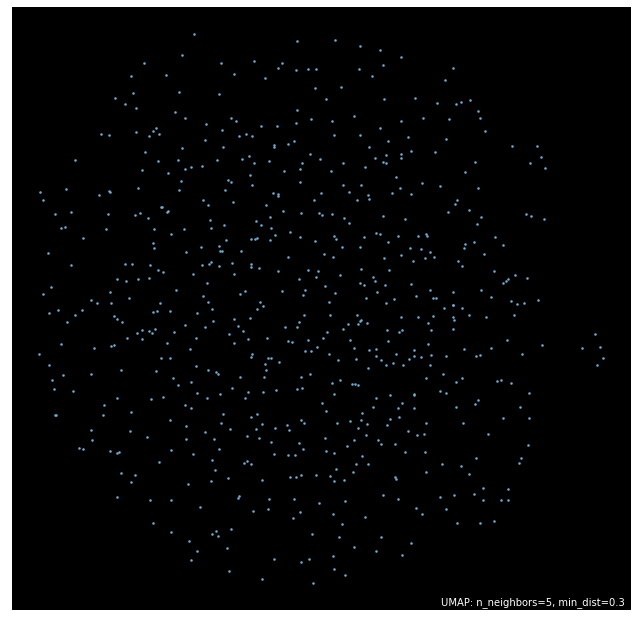

In [103]:
import umap.plot

#UMAP

reducer = umap.UMAP(n_components = 2, n_neighbors = 5, min_dist = 0.3, random_state = 42).fit(normalized)

#plot

umap.plot.points(reducer, background='black')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

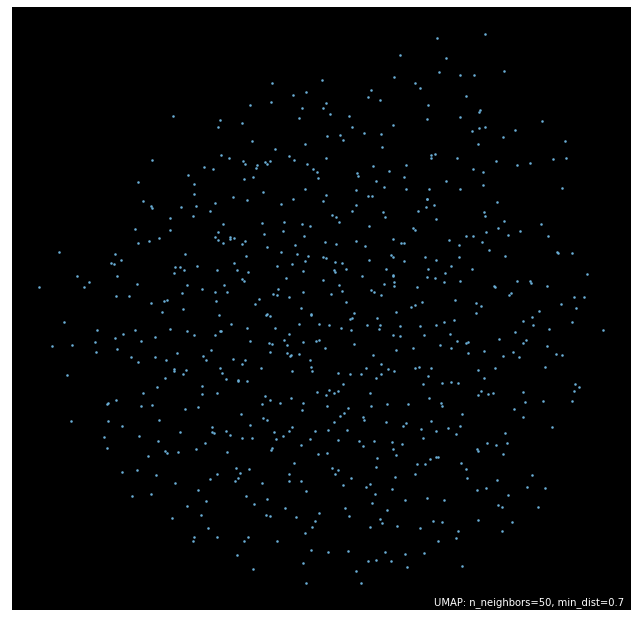

In [104]:
#UMAP

reducer = umap.UMAP(n_components = 2, n_neighbors = 50, min_dist = 0.7, random_state = 42).fit(normalized)

#plot

umap.plot.points(reducer,background='black')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

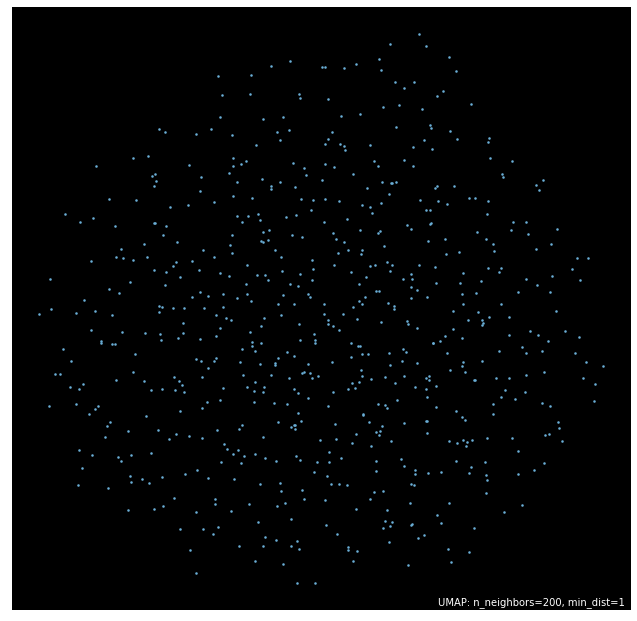

In [97]:
#UMAP

reducer = umap.UMAP(n_components = 2, n_neighbors = 200, min_dist = 1, random_state = 42).fit(normalized)

#plot

umap.plot.points(reducer, background='black')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

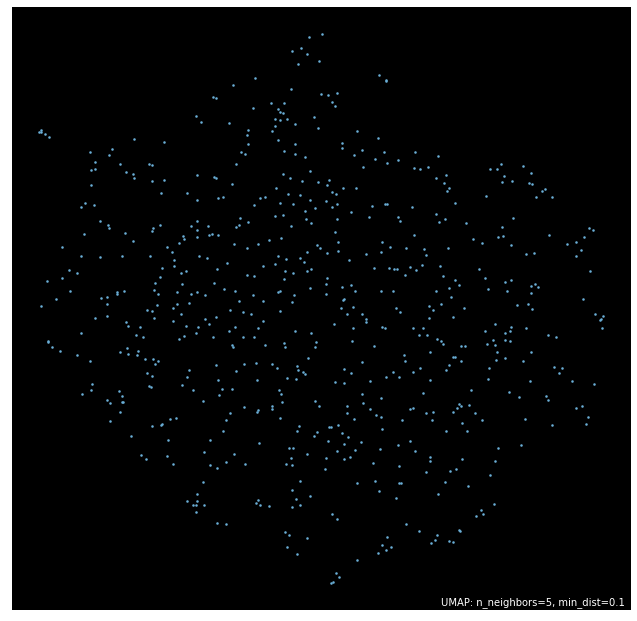

In [100]:
#UMAP

reducer = umap.UMAP(n_components = 2, n_neighbors = 5, min_dist = 0.1, random_state = 42).fit(normalized)
5
#plot

umap.plot.points(reducer, background='black')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:>

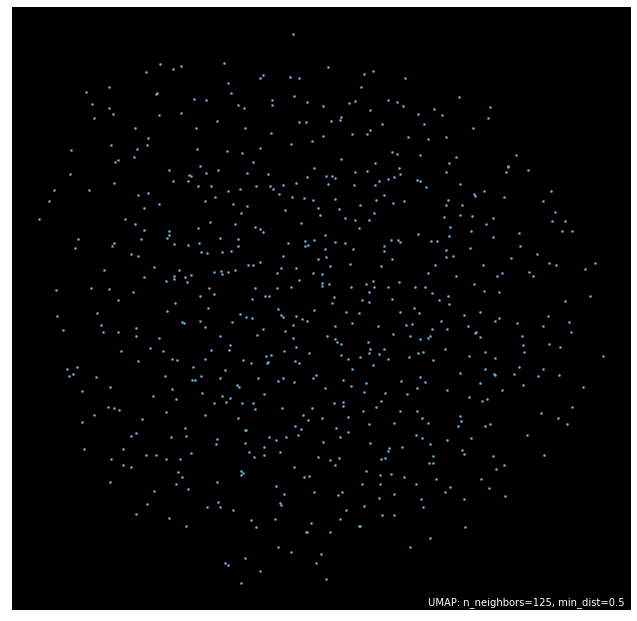

In [106]:
#UMAP

reducer = umap.UMAP(n_components = 2, n_neighbors = 125, min_dist = 0.5, random_state = 42).fit(normalized)

#plot

umap.plot.points(reducer, background='black')


# t-SNE

- The Wisconsin Breast Cancer dataset http://bit.ly/2xAuP5t includes data of 569 breast cancer patients. In detail, first column is PatientID, second column is the Diagnosis (Malignant/Begnin), while the remaining column 3-32 consists of 3 groups of 10 histological descriptors of tumoral cells; for each descriptor, its Average, StandardError and Worst Case are listed. Using the 30 descriptor columns, project using t-SNE the 569 patients on a 2D space and color them according to their diagnosis. Are the two different diagnoses well separated in the 2D space? Repeat the same procedure using only the last 10 Worst Case columns: is the separation between diagnoses improving or worsening?


In [109]:
from sklearn.manifold import TSNE

In [108]:
df = pd.read_csv(r"C:\Users\cirob\Desktop\Data visualization lab\csv\WisconsinBreastCancer.csv")

df

,patient ID,patient diagnosis,Average radius,Average texture,Average perimeter,Average area,Average smoothness,Average compactness,Average concavity,Average concave points,...,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [116]:
diagnosis = df['patient diagnosis']

diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: patient diagnosis, Length: 569, dtype: object

In [113]:
col_names = df.columns[2:]

df[col_names]

,Average radius,Average texture,Average perimeter,Average area,Average smoothness,Average compactness,Average concavity,Average concave points,Average symmetry,Average fractal dimension,...,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [137]:
#t-SNE for the whole dataset
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=250, init='random', learning_rate=200)   
t_results = tsne.fit_transform(df[col_names].values)

Text(0, 0.5, 't-SNE second parameter')

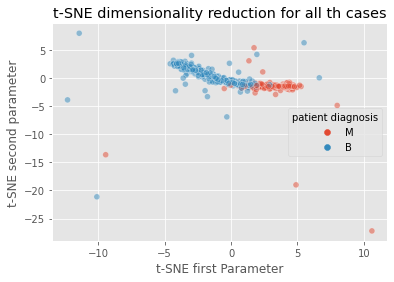

In [138]:
#Plot t-SNE
sns.scatterplot(x=t_results[:, 0],
                y= t_results[:, 1],
                hue=diagnosis,
                legend="full", alpha=0.5)


plt.title('t-SNE dimensionality reduction for all th cases')
plt.xlabel('t-SNE first Parameter')
plt.ylabel('t-SNE second parameter')

In [123]:
Worst_Case_col_names = df.columns[22:]

df[Worst_Case_col_names]

,Worst radius,Worst texture,Worst perimeter,Worst area,Worst smoothness,Worst compactness,Worst concavity,Worst concave points,Worst symmetry,Worst fractal dimension
0,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...
564,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [124]:
#t-SNE for the worst cases
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=250, init='random', learning_rate=200)   
t_worst_results = tsne.fit_transform(df[col_names].values)

Text(0, 0.5, 't-SNE second parameter')

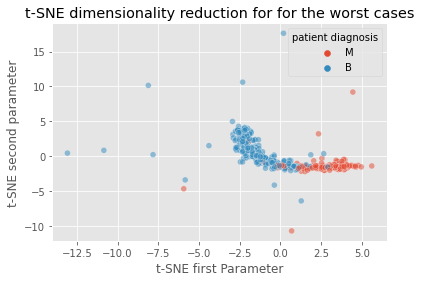

In [125]:
#Plot t-SNE
sns.scatterplot(x=t_worst_results[:, 0],
                y= t_worst_results[:, 1],
                hue=diagnosis,
                legend="full", alpha=0.5)


plt.title('t-SNE dimensionality reduction for for the worst cases')
plt.xlabel('t-SNE first Parameter')
plt.ylabel('t-SNE second parameter')

Visual encoding is the fundamental of any data representation. We can define visual encoding such as a way to assigning visual properties to data values. As visualizer, we encode the data using **marks** and **attributes**.
1. **Marks** are the visual feature and they can represent a record of instance of data or groupings of records or instances. The principal four marks are: points, lines, shape, form. 
2. **Attributes** are variations applied to the visual appearance of marks in order to represent the values associated with each data item. 